6210407960 นายธนกร วงษ์สนิท

# การทำนายการเป็นโรคหัวใจและหลอดเลือด
โรคหัวใจและหลอดเลือด (cardiovascular diseases) เป็นกลุ่มโรคที่เกิดกับระบบหัวใจและหลอดเลือดซึ่งเป็นสาเหตุการเสียชีวิตลำดับต้นๆของคนไทย หากเราทำนายได้ว่าบุคคลใดมีความเสี่ยงที่จะเป็นโรคหัวใจและหลอดเลือดได้ จะทำให้เกิดประโยชน์ค่อนข้างมากไม่ว่าจะเป็นการทำการรักษาที่ทันเวลา หรือการรักษาก่อนเกิดสภาวะที่ร้ายแรง ชุดข้อมูลนี้มีข้อมูลพื้นฐานของผู้ป่วยต่างๆ เช่น เพศ อายุ พฤติกรรมของผู้ป่วย โดยแต่ละแถวในข้อมูลจะให้ข้อมูลเกี่ยวกับผู้ป่วย ซึ่งชุดข้อมูลที่เลือกนำมาวิเคราะห์ คือ `'cvd_dataset.csv'`
### แหล่งข้อมูล [Cardiovascular Disease dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

cvd = pd.read_csv('./data/cvd_dataset.csv', sep=';', index_col=["id"])
cvd.sample(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
33470,20460,1,159,87.0,130,90,2,2,0,0,1,0
97362,22123,1,168,65.0,130,80,1,1,0,0,1,0
62715,21317,1,163,68.0,160,90,1,1,0,0,1,1
60080,21212,1,167,65.0,120,80,1,1,0,0,1,0
61351,17275,1,161,88.0,110,70,2,1,0,0,1,0
87838,20325,1,161,62.0,120,80,1,1,0,0,0,0
11230,18246,1,160,69.0,120,80,1,2,0,0,1,0
65262,14284,1,156,70.0,100,80,3,3,0,0,0,0
29451,19691,2,166,75.0,130,90,2,1,1,0,1,1


### cvd_dataset.csv
ข้อมูลชุดนี้มีข้อมูลทั้งหมด 70000 แถว และ 12 คอลัมน์ ซึ่งประกอบไปด้วยข้อมูลต่างๆที่เกี่ยวข้องกับผู้ป่วย โดยข้อมูลสามารถแบ่งได้เป็น 3 ประเภท ได้แก่ 

- Objective: factual information
- Examination: results of medical examination
- Subjective: information given by the patient

<br>
<ins>คำอธิบายแต่ละคอลัมน์</ins>

| Column | Description | Data Type |
| :--------- | :---------- | :----|
| age | Age | int (days)
| height | Height | int (cm) |
| weight | Weight | float (kg) |
| gender | Gender | categorical code |
| ap_hi | Systolic blood pressure | int |
| ap_lo | Diastolic blood pressure | int |
| cholesterol | Cholesterol | 1: normal, 2: above normal, 3: well above normal |
| gluc | Glucose | 1: normal, 2: above normal, 3: well above normal |
| smoke | Smoking | binary |
| alco | Alcohol intake | binary |
| active | Physical activity | binary |
| cardio | Presence or absence of cardiovascular disease | binary |

<br>
<ins>วิเคราะห์ข้อมูลในแต่ละfeature</ins>


In [2]:
cvd.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
cvd.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

จะเห็นว่า 2 มีความสูงเฉลี่ยมากกว่า 1 ดังนั้น 2 แทนเพศชาย 

<ins>วิเคราะห์ว่าข้อมูลมีคนที่เป็นโรคและไม่เป็นโรคใกล้เคียงกันหรือไม่<ins/>

In [4]:
cvd['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

In [5]:
a,b =cvd['cardio'].value_counts(normalize=True)

In [6]:
a

0.5003

In [7]:
b

0.4997

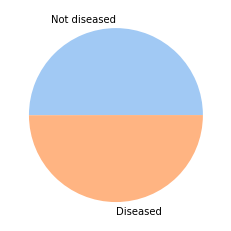

In [8]:
#define data
data = [a, b]
labels = ['Not diseased', 'Diseased']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors)
plt.show()

## คัดกรองข้อมูลและเตรียมข้อมูล
นำข้อมูลแถวที่มีค่าเป็น null ออก

In [9]:
cvd.isnull().values.any()

False

ค่าความดันโลหิตแบ่งออกเป็น 2 ค่า คือ

- ค่าความดันโลหิตตัวบน (Systolic Blood Pressure) คือค่าความดันโลหิตในหลอดเลือดที่เกิดขึ้นขณะที่หัวใจบีบตัว [70-200 mmHg]
- ค่าความดันโลหิตตัวล่าง (Diastolic Blood Pressure) คือค่าความดันของเลือดที่ขณะที่หัวใจคลายตัว [40-140 mmHg]

systolic blood pressure ต้องมีค่ามากกว่า diastolic blood pressure มีบางrecordที่ไม่เป็นไปตามนี้ ดังนั้นต้องเอาออก(มีทั้งหมด1234records)

In [10]:
cvd[cvd['ap_lo']> cvd['ap_hi']].shape[0]

1234

In [11]:
cvd.drop(cvd[cvd['ap_lo']> cvd['ap_hi']].index)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [12]:
cvd.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


นำblood pressure ที่น้อยหรือมากเกินความเป็นจริงที่จะเป็นไปได้ เช่น ความดันโลหิตติดลบ ออกทั้งหมด

In [13]:
cvd=cvd.drop(cvd[(cvd['ap_hi'] > cvd['ap_hi'].quantile(0.975)) | (cvd['ap_hi'] < cvd['ap_hi'].quantile(0.025))].index)

In [14]:
cvd=cvd.drop(cvd[(cvd['ap_lo'] > cvd['ap_lo'].quantile(0.975)) | (cvd['ap_lo'] < cvd['ap_lo'].quantile(0.025))].index)
cvd

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1


In [15]:
cvd.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66193.000000,66193.000000,66193.000000,66193.000000,66193.000000,66193.000000,66193.000000,66193.000000,66193.000000,66193.000000,66193.000000,66193.000000
mean,19474.771698,1.350007,164.428414,74.094533,126.252519,81.183962,1.360869,1.223936,0.087502,0.052906,0.803544,0.492892
std,2465.001772,0.476975,8.153724,14.130058,14.459022,8.403263,0.677058,0.570739,0.282571,0.223847,0.397320,0.499953
min,10798.000000,1.000000,55.000000,11.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17678.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19708.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21332.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


ภาวะอ้วนนับเป็นหนึ่งในปัจจัยเสี่ยงต่อการเกิดโรคหัวใจและหลอดเลือด ดังนั้นจึงเพิ่มfeature BMI  เข้ามาด้วย

In [16]:
cvd['bmi'] = cvd['weight']/(cvd['height']/100)**2
cvd

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681


## แบ่งชุดข้อมูล
- X คือ ชุดตัวแปรต้น
- Y คือ ชุดตัวแปรตามหรือผลเฉลย

In [17]:
X = cvd.drop('cardio', axis=1)
Y = cvd.cardio

In [18]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
99992,21074,1,165,80.0,150,80,1,1,0,0,1,29.384757
99993,19240,2,168,76.0,120,80,1,1,1,0,1,26.927438
99995,22601,1,158,126.0,140,90,2,2,0,0,1,50.472681


In [19]:
Y

id
0        0
1        1
2        1
3        1
4        0
        ..
99992    1
99993    0
99995    1
99998    1
99999    0
Name: cardio, Length: 66193, dtype: int64

### Preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X)

In [21]:
scaler.mean_

array([1.94747717e+04, 1.35000680e+00, 1.64428414e+02, 7.40945331e+01,
       1.26252519e+02, 8.11839621e+01, 1.36086897e+00, 1.22393607e+00,
       8.75016996e-02, 5.29058964e-02, 8.03544181e-01, 2.74916717e+01])

In [22]:
scaler.scale_ 

array([2.46498315e+03, 4.76971739e-01, 8.15366247e+00, 1.41299516e+01,
       1.44589123e+01, 8.40319964e+00, 6.77053011e-01, 5.70734883e-01,
       2.82568845e-01, 2.23845622e-01, 3.97317165e-01, 5.98487458e+00])

In [23]:
standard_X = scaler.transform(X)

In [24]:
standard_X

array([[-0.43885562,  1.36274993,  0.43803458, ..., -0.23634993,
         0.4944559 , -0.92308559],
       [ 0.30557138, -0.73381035, -1.03369669, ..., -0.23634993,
         0.4944559 ,  1.24246672],
       [-0.25061903, -0.73381035,  0.07010176, ..., -0.23634993,
        -2.02242503, -0.66565578],
       ...,
       [ 1.26825544, -0.73381035, -0.78840814, ..., -0.23634993,
         0.4944559 ,  3.83984805],
       [ 1.19928946, -0.73381035, -0.17518678, ..., -0.23634993,
        -2.02242503, -0.06556874],
       [ 0.43214425, -0.73381035,  0.68332312, ..., -0.23634993,
         0.4944559 , -0.4307821 ]])

ทำการแบ่งกลุ่มของข้อมูล

เพื่อที่จะทำการ train model และ test model ด้วยชุดข้อมูลที่ model ไม่เคยเห็นมาก่อน
* ข้อมูลชุด train model        `X_train`
* ชุดข้อมูลสำหรับ test model    `X_test`
* ชุดคำตอบของชุด train model  `Y_train`
* ชุดคำตอบของ test model     `Y_test`

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(standard_X, Y)

## K-Nearest Neighbors 

### สร้าง Model แบบ K-Nearest Neighbors 
Algorithms K-Nearest Neighbors 

หา n_neighbors ที่ดีที่สุดด้วย GridSearchCV โดย n_neighbors ที่ทำการ brute force คือ 1 3 5 7 9 11 13 15 17 19 21

In [26]:
params = {'n_neighbors': [ i for i in range(1, 22, 2)]}
params

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}

In [27]:
test_knn = KNeighborsClassifier()
gs_cv = GridSearchCV(test_knn, params)
gs_cv.fit(X_train, Y_train)
best_k = gs_cv.best_params_['n_neighbors']
best_k

21

In [28]:
kNN = KNeighborsClassifier(best_k)
kNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=21)

In [29]:
kNN.score(X_test, Y_test)

0.7162366306121216

### K-Nearest Neighbors ร่วมกับการแบ่งกลุ่มข้อมูลแบบ KFold
KFold เป็นการ suffle ข้อมูลร่วมกับการแบ่งข้อมูล 

ทำให้ Dataset ที่มีการ Bias ของข้อมูล Train Model ได้แม่นยำมากขึ้น


In [30]:
kf = KFold(n_splits=6)

In [31]:
kNN = KNeighborsClassifier(best_k)

In [32]:
dfX=pd.DataFrame(standard_X)

In [33]:
for train_index, test_index in kf.split(X):
    X_train_kfold = dfX.iloc[train_index]
    X_test_kfold = dfX.iloc[test_index]
    y_train_kfold = pd.Series(Y.iloc[train_index])
    y_test_kfold = pd.Series(Y.iloc[test_index])
    kNN.fit(X_train_kfold, y_train_kfold)

#### จากการทำ Validation จะได้ความแม่นยำของ Model ที่ใช้ Algorithm K-Nearest Neighbors คือ

In [34]:
acc_knn = round(kNN.score(X_train_kfold, y_train_kfold)*100, 2)
acc_knn 

74.31

In [35]:
acc_test_knn = round(kNN.score(X_test_kfold, y_test_kfold)*100, 2)
acc_test_knn

71.9

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

lgtr = LogisticRegression().fit(X_train, Y_train)

In [37]:
lgtr.score(X_train,Y_train)

0.7237934090725969

In [38]:
acc1 = round(lgtr.score(X_train, Y_train)*100, 2)
acc1

72.38

In [39]:
lgtr.score(X_test,Y_test)

0.7214333192337906

In [40]:
acc_test_lgtr = round(lgtr.score(X_test, Y_test)*100, 2)
acc_test_lgtr

72.14

In [41]:
arr=np.array([-0.1,-0.3,-0.5,-0.8,-0.1,-0.08,-0.5,-0.3,-0.3108,-0.23838436,-0.29416711,0.1]).reshape(1, -1)
lgtr.predict(arr)

array([0])

In [42]:
arr=np.array([1.04,-0.7,-0.4,0.9,0.85,0.98,2.22,-0.5,3.21087913,-0.3436,-2.02416711,0.5]).reshape(1, -1)
lgtr.predict(arr)

array([1])

In [43]:
X_test

array([[-0.15812347, -0.73381035, -0.29783105, ..., -0.23634993,
         0.4944559 ,  0.8181765 ],
       [-1.78450376, -0.73381035, -2.13749514, ..., -0.23634993,
        -2.02242503,  0.89642788],
       [ 0.44512609,  1.36274993,  1.29654449, ..., -0.23634993,
         0.4944559 , -0.71981428],
       ...,
       [ 1.06987681, -0.73381035,  0.92861167, ..., -0.23634993,
        -2.02242503,  0.77199291],
       [-0.17272804, -0.73381035, -0.29783105, ..., -0.23634993,
         0.4944559 ,  0.62717527],
       [ 0.51855458, -0.73381035,  0.07010176, ..., -0.23634993,
         0.4944559 , -0.66565578]])

In [44]:
Y_test

id
26105    1
76591    0
2035     0
27345    0
17375    0
        ..
13639    0
50872    1
90184    1
34778    0
78659    1
Name: cardio, Length: 16549, dtype: int64

### Logistic regression ร่วมกับการแบ่งกลุ่มข้อมูลแบบ KFold

In [45]:
kf = KFold(n_splits=2)
for train_index, test_index in kf.split(X):
    X_train_kfold = dfX.iloc[train_index]
    X_test_kfold = dfX.iloc[test_index]
    y_train_kfold = pd.Series(Y.iloc[train_index])
    y_test_kfold = pd.Series(Y.iloc[test_index])
    lgtr = LogisticRegression().fit(X_train_kfold, y_train_kfold)

In [46]:
acc_lgtr = round(lgtr.score(X_train_kfold, y_train_kfold)*100, 2)
acc_lgtr

72.32

In [47]:
acc_test_lgtr = round(lgtr.score(X_test_kfold, y_test_kfold)*100, 2)
acc_test_lgtr

72.37

## Support Vector Machine
#### SVM ร่วมกับการแบ่งกลุ่มข้อมูลแบบ KFold

In [48]:
from sklearn.svm import SVC
import numpy as np

In [49]:
svc = SVC(kernel='linear')

In [50]:
kf = KFold(n_splits=2)
for train_index, test_index in kf.split(X):
    X_train_kfold = dfX.iloc[train_index]
    X_test_kfold = dfX.iloc[test_index]
    y_train_kfold = pd.Series(Y.iloc[train_index])
    y_test_kfold = pd.Series(Y.iloc[test_index])
    svm = svc.fit(X_train_kfold, y_train_kfold)

In [51]:
acc_svm = round(svm.score(X_train_kfold, y_train_kfold)*100, 2)
acc_svm

72.28

In [52]:
acc_test_svm = round(svm.score(X_test_kfold, y_test_kfold)*100, 2)
acc_test_svm

72.01

### (เพิ่มเติม) SVM แบบ Polynomial kernel

In [53]:
from sklearn.pipeline import Pipeline

svcp = SVC(kernel='poly', C=1.0)

In [54]:
kf = KFold(n_splits=2)
for train_index, test_index in kf.split(X):
    X_train_kfold = dfX.iloc[train_index]
    X_test_kfold = dfX.iloc[test_index]
    y_train_kfold = pd.Series(Y.iloc[train_index])
    y_test_kfold = pd.Series(Y.iloc[test_index])
    svm2 = svcp.fit(X_train_kfold, y_train_kfold)

In [55]:
acc_svm2 = round(svm2.score(X_train_kfold, y_train_kfold) * 100, 2)
acc_svm2

71.67

In [56]:
acc_test_svm2 = round(svm2.score(X_test_kfold, y_test_kfold) *100, 2)
acc_test_svm2

71.24

จะเห็นว่า accuracy ของ SVM ทั้งสองแบบไม่ได้ต่างกันมาก

In [57]:
cmp_svm = pd.DataFrame({
    'Model': ['แบบ Linear', 'แบบ Polynomial'],
    'Score_train': [acc_svm, acc_svm2],
    'Score_test': [acc_test_svm, acc_test_svm2]})

In [58]:
cmp_svm.sort_values(['Score_test'], ascending=False)

,Model,Score_train,Score_test
0,แบบ Linear,72.28,72.01
1,แบบ Polynomial,71.67,71.24


In [59]:
cmp_svm['Score_diff'] = abs(cmp_svm['Score_train'] - cmp_svm['Score_test'])
cmp_svm.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Score_diff
0,แบบ Linear,72.28,72.01,0.27
1,แบบ Polynomial,71.67,71.24,0.43


## Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

GaussianNB()

In [62]:
acc_nb = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_nb

71.01

In [63]:
acc_test_nb = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_test_nb

70.65

In [64]:
# validation
kf = KFold(n_splits=2)
for train_index, test_index in kf.split(X):
    X_train_kfold = dfX.iloc[train_index]
    X_test_kfold = dfX.iloc[test_index]
    y_train_kfold = pd.Series(Y.iloc[train_index])
    y_test_kfold = pd.Series(Y.iloc[test_index])
    gau = gaussian.fit(X_train_kfold, y_train_kfold)

In [65]:
acc_nb2 = round(gau.score(X_train_kfold, y_train_kfold) * 100, 2)
acc_nb2

71.0

In [66]:
acc_test_nb2 = round(gau.score(X_test_kfold, y_test_kfold) * 100, 2)
acc_test_nb2

70.71

# Models evaluation

In [67]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Support Vector Machine', 'Naive Bayes'],
    'Score_train': [acc_knn, acc_lgtr, acc_svm, acc_nb],
    'Score_test': [acc_test_knn, acc_test_lgtr, acc_test_svm, acc_test_nb]})

เรียง accuracy จาก train score

In [68]:
models.sort_values(['Score_train'], ascending=False)

,Model,Score_train,Score_test
0,KNN,74.31,71.90
1,Logistic Regression,72.32,72.37
2,Support Vector Machine,72.28,72.01
3,Naive Bayes,71.01,70.65


เรียง accuracy จาก test score

In [69]:
models.sort_values(['Score_test'], ascending=False)

,Model,Score_train,Score_test
1,Logistic Regression,72.32,72.37
2,Support Vector Machine,72.28,72.01
0,KNN,74.31,71.90
3,Naive Bayes,71.01,70.65


เรียง accuracy จากผลต่างของคะแนนจากการ train และ test

In [70]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Score_diff
1,Logistic Regression,72.32,72.37,0.05
2,Support Vector Machine,72.28,72.01,0.27
3,Naive Bayes,71.01,70.65,0.36
0,KNN,74.31,71.90,2.41
